In [60]:
from deepface import DeepFace
from mtcnn.mtcnn import MTCNN

In [3]:
import cv2
import matplotlib.pyplot as plt

In [87]:
def find_face_MTCNN(frame, result_list):
    for result in result_list:
        x, y, w, h = result['box']
        crop_img = frame[y:y+h, x:x+w]
        if len(result)>0:
            cv2.imwrite("img2.jpg",frame)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,155,255) ,2)
    return frame

detector = MTCNN()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX
c=0

while True:
    ret, frame = cap.read()
    faces = detector.detect_faces(frame)
    detectFaceMTCNN = find_face_MTCNN(frame, faces)
    frame = cv2.putText(frame, str(c), (50, 50), font, 1, (255, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Video', detectFaceMTCNN)
    if len(faces)>0:
        c = c + 1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    if c == 1:
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 137ms/step


In [88]:
img1_path = './img1.jpg'
img2_path = './img2.jpg'

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

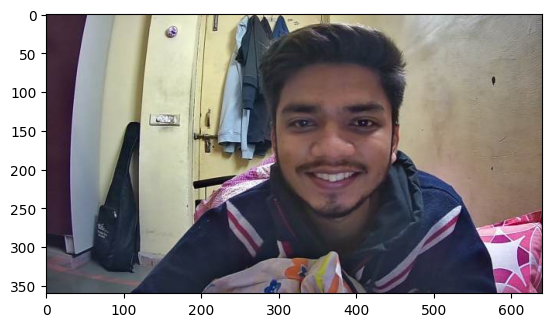

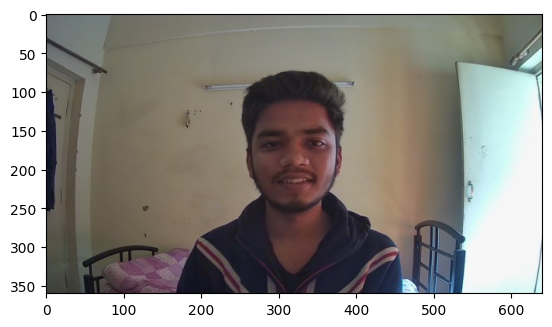

In [89]:
plt.imshow(img1[:, :, ::-1 ]) #setting value as -1 to maintain saturation
plt.show()
plt.imshow(img2[:, :, ::-1 ]) 
plt.show() 

In [90]:
model_name = "VGG-Face"
model = DeepFace.build_model(model_name) 

In [91]:
result = DeepFace.verify(img1_path,img2_path)#validate our images
DeepFace.verify("Img1.jpg","Img2.jpg")#generating result of comparison 

1/1 [==============================] - 0s 222ms/step


{'verified': True,
 'distance': 0.1454661716482234,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

## Database

In [92]:
df = DeepFace.find(img_path = "img2.jpg", db_path = "../data/Shivansh/")

1/1 [==============================] - 0s 379ms/step
Representations stored in  ../data/Shivansh/ / representations_vgg_face.pkl  file. Please delete this file when you add new identities in your database.
1/1 [==============================] - 0s 232ms/step
find function lasts  9.23157024383545  seconds


In [93]:
df.head()

,identity,VGG-Face_cosine
0,../data/Shivansh//19.jpg,0.097177
1,../data/Shivansh//6.jpg,0.112417
2,../data/Shivansh//16.jpg,0.117129
3,../data/Shivansh//18.jpg,0.119119
4,../data/Shivansh//24.jpg,0.121027


# Different Models

In [33]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

#face verification
result = DeepFace.verify(img1_path = "img1.jpg", img2_path = "img2.jpg", model_name = models[1])

#face recognition
df = DeepFace.find(img_path = "img1.jpg", db_path = "../data/Shivansh/", model_name = models[1])

1/1 [==============================] - 0s 60ms/step
Representations stored in  ../data/Shivansh/ / representations_facenet.pkl  file. Please delete this file when you add new identities in your database.
1/1 [==============================] - 0s 57ms/step
find function lasts  4.233184814453125  seconds


In [34]:
result

{'verified': True,
 'distance': 0.29758200408147495,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [35]:
df.head()

,identity,Facenet_cosine
0,../data/Shivansh//28.jpg,0.123576
1,../data/Shivansh//27.jpg,0.140582
2,../data/Shivansh//13.jpg,0.143646
3,../data/Shivansh//6.jpg,0.145468
4,../data/Shivansh//23.jpg,0.149661


# Metrics

In [38]:
metrics = ["cosine", "euclidean", "euclidean_l2"]

#face verification
result = DeepFace.verify(img1_path = "img1.jpg", img2_path = "img2.jpg", distance_metric = metrics[1])

#face recognition
df = DeepFace.find(img_path = "img1.jpg", db_path = "../data/Shivansh/", distance_metric = metrics[1])

1/1 [==============================] - 0s 274ms/step
There are  25  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 300ms/step
find function lasts  0.4572620391845703  seconds


In [40]:
result

{'verified': True,
 'distance': 0.3066824770747081,
 'threshold': 0.6,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean'}

In [41]:
df.head()

,identity,VGG-Face_euclidean
0,../data/Shivansh//11.jpg,0.191674
1,../data/Shivansh//27.jpg,0.205695
2,../data/Shivansh//6.jpg,0.219416
3,../data/Shivansh//4.jpg,0.222041
4,../data/Shivansh//26.jpg,0.225169


## Analysis

In [77]:
DeepFace.analyze(img_path = "img2.jpg", actions = ['age', 'gender', 'race', 'emotion'])

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

1/1 [==============================] - 0s 379ms/step


Action: gender:  25%|██▌       | 1/4 [00:00<00:01,  2.03it/s]

1/1 [==============================] - 0s 431ms/step


Action: race:  50%|█████     | 2/4 [00:01<00:01,  1.96it/s]  

1/1 [==============================] - 0s 336ms/step


Action: emotion:  75%|███████▌  | 3/4 [00:01<00:00,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


{'age': 29,
 'region': {'x': 303, 'y': 171, 'w': 106, 'h': 106},
 'gender': 'Man',
 'race': {'asian': 22.968055307865143,
  'indian': 15.391556918621063,
  'black': 15.693198144435883,
  'white': 12.5161811709404,
  'middle eastern': 11.396320909261703,
  'latino hispanic': 22.03468829393387},
 'dominant_race': 'asian',
 'emotion': {'angry': 18.442438542842865,
  'disgust': 0.0004227035788062494,
  'fear': 14.627721905708313,
  'happy': 0.10801745811477304,
  'sad': 3.5339776426553726,
  'surprise': 4.575106129050255,
  'neutral': 58.71231555938721},
 'dominant_emotion': 'neutral'}

In [46]:
DeepFace.analyze(img_path = "img1.jpg", actions = ['age', 'gender', 'race', 'emotion'])

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

1/1 [==============================] - 0s 264ms/step


Action: gender:  25%|██▌       | 1/4 [00:00<00:01,  2.52it/s]

1/1 [==============================] - 0s 260ms/step


Action: race:  50%|█████     | 2/4 [00:00<00:00,  2.73it/s]  

1/1 [==============================] - 0s 212ms/step


Action: emotion:  75%|███████▌  | 3/4 [00:01<00:00,  3.11it/s]

1/1 [==============================] - 0s 24ms/step


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]


{'age': 24,
 'region': {'x': 272, 'y': 65, 'w': 193, 'h': 193},
 'gender': 'Man',
 'race': {'asian': 5.950034445520109,
  'indian': 61.4643381280496,
  'black': 5.677430027433631,
  'white': 1.1643121493682684,
  'middle eastern': 0.9584766601351905,
  'latino hispanic': 24.785405422996828},
 'dominant_race': 'indian',
 'emotion': {'angry': 1.8875954618802204e-09,
  'disgust': 1.0699462691700357e-12,
  'fear': 2.942399145514085e-10,
  'happy': 99.8639166355133,
  'sad': 1.596731635800097e-05,
  'surprise': 2.759311112932039e-08,
  'neutral': 0.13606329448521137},
 'dominant_emotion': 'happy'}

# Video

In [86]:
DeepFace.stream(db_path = "../data/Shivansh/")

Detector backend is  opencv
VGG-Face  is built
Emotion model loaded
Age model loaded
Gender model loaded
Facial attibute analysis models loaded in  0.009029388427734375  seconds


Finding embedding for 10.jpg:   0%|          | 0/25 [00:00<?, ?it/s]

1/1 [==============================] - 0s 211ms/step


Finding embedding for 11.jpg:   4%|▍         | 1/25 [00:00<00:08,  2.94it/s]

1/1 [==============================] - 0s 407ms/step


Finding embedding for 12.jpg:   8%|▊         | 2/25 [00:00<00:10,  2.28it/s]

1/1 [==============================] - 0s 247ms/step


Finding embedding for 13.jpg:  12%|█▏        | 3/25 [00:01<00:09,  2.36it/s]

1/1 [==============================] - 0s 223ms/step


Finding embedding for 14.jpg:  16%|█▌        | 4/25 [00:01<00:08,  2.62it/s]

1/1 [==============================] - 0s 259ms/step


Finding embedding for 16.jpg:  20%|██        | 5/25 [00:01<00:07,  2.70it/s]

1/1 [==============================] - 0s 224ms/step


Finding embedding for 18.jpg:  24%|██▍       | 6/25 [00:02<00:06,  2.81it/s]

1/1 [==============================] - 0s 224ms/step


Finding embedding for 19.jpg:  28%|██▊       | 7/25 [00:02<00:06,  2.90it/s]

1/1 [==============================] - 0s 225ms/step


Finding embedding for 2.jpg:  32%|███▏      | 8/25 [00:02<00:05,  2.97it/s] 

1/1 [==============================] - 0s 405ms/step


Finding embedding for 20.jpg:  36%|███▌      | 9/25 [00:03<00:06,  2.46it/s]

1/1 [==============================] - 0s 409ms/step


Finding embedding for 21.jpg:  40%|████      | 10/25 [00:04<00:06,  2.19it/s]

1/1 [==============================] - 0s 371ms/step


Finding embedding for 22.jpg:  44%|████▍     | 11/25 [00:04<00:06,  2.11it/s]

1/1 [==============================] - 0s 207ms/step


Finding embedding for 23.jpg:  48%|████▊     | 12/25 [00:04<00:05,  2.34it/s]

1/1 [==============================] - 0s 204ms/step


Finding embedding for 24.jpg:  52%|█████▏    | 13/25 [00:05<00:04,  2.56it/s]

1/1 [==============================] - 0s 203ms/step


Finding embedding for 25.jpg:  56%|█████▌    | 14/25 [00:05<00:03,  2.76it/s]

1/1 [==============================] - 0s 206ms/step


Finding embedding for 26.jpg:  60%|██████    | 15/25 [00:05<00:03,  2.91it/s]

1/1 [==============================] - 0s 209ms/step


Finding embedding for 27.jpg:  64%|██████▍   | 16/25 [00:06<00:02,  3.02it/s]

1/1 [==============================] - 0s 207ms/step


Finding embedding for 28.jpg:  68%|██████▊   | 17/25 [00:06<00:02,  3.11it/s]

1/1 [==============================] - 0s 207ms/step


Finding embedding for 3.jpg:  72%|███████▏  | 18/25 [00:06<00:02,  3.17it/s] 

1/1 [==============================] - 0s 206ms/step


Finding embedding for 4.jpg:  76%|███████▌  | 19/25 [00:06<00:01,  3.22it/s]

1/1 [==============================] - 0s 202ms/step


Finding embedding for 5.jpg:  80%|████████  | 20/25 [00:07<00:01,  3.27it/s]

1/1 [==============================] - 0s 200ms/step


Finding embedding for 6.jpg:  84%|████████▍ | 21/25 [00:07<00:01,  3.32it/s]

1/1 [==============================] - 0s 205ms/step


Finding embedding for 7.jpg:  88%|████████▊ | 22/25 [00:07<00:00,  3.32it/s]

1/1 [==============================] - 0s 209ms/step


Finding embedding for 8.jpg:  92%|█████████▏| 23/25 [00:08<00:00,  3.33it/s]

1/1 [==============================] - 0s 203ms/step


Finding embedding for 9.jpg:  96%|█████████▌| 24/25 [00:08<00:00,  3.36it/s]

1/1 [==============================] - 0s 207ms/step


Finding embedding for 9.jpg: 100%|██████████| 25/25 [00:08<00:00,  2.86it/s]


Embeddings found for given data set in  8.741608381271362  seconds
1/1 [==============================] - 0s 215ms/step
